In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DataAnalysis.config import MERGE_DICT

In [128]:
df = pd.read_csv("../python.csv")

Leaving only cells where `skills` is not `-1`

In [129]:
df_skills_not_null = df[df["skills"] != "-1"]

Counting skills

In [130]:
skills_series = df_skills_not_null["skills"].str.split(",").explode().str.strip().value_counts()
skills_series

skills
Python                      104
Django                       29
Python / Django              19
AWS                          18
SQL                          15
                           ... 
Asynchronous programming      1
microservices                 1
FinTech                       1
Vue                           1
HTML / CSS / JavaScript       1
Name: count, Length: 216, dtype: int64

Performing merges to make result more readable

In [131]:
merge_dict = MERGE_DICT

"""Add similar skills to each canonical skill"""
for canonical_skill, similar_skills in merge_dict.items():
    for skill in similar_skills:
        if skill in skills_series:
            skills_series[canonical_skill] += skills_series[skill]

"""Remove similar skills from pull of all skills"""
for similar_skills in merge_dict.values():
    for skill in similar_skills:
        if skill in skills_series:
            del skills_series[skill]

skills_series.rename(index={"Django REST Framework": "DRF"}, inplace=True)
filtered_skills_series = skills_series.sort_values(ascending=False)
filtered_skills_series

skills
Python                      150
Django                       62
AWS                          27
FastAPI                      23
Postgres                     22
                           ... 
Asynchronous programming      1
microservices                 1
FinTech                       1
Vue                           1
HTML / CSS / JavaScript       1
Name: count, Length: 158, dtype: int64

Resulting Plot with 10 most required skills for python developer on Djinni

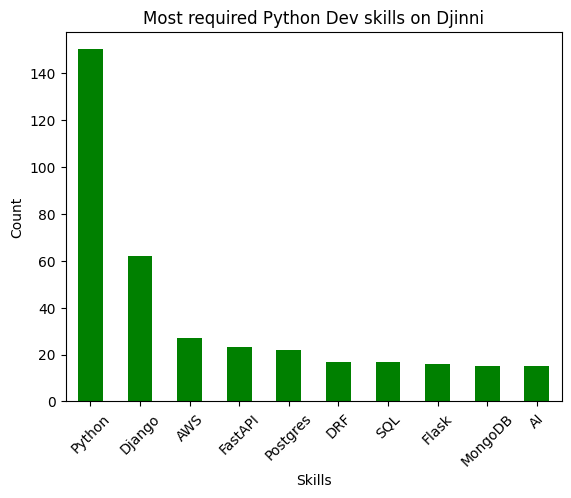

In [132]:
Bar_plot = filtered_skills_series[:10]

Bar_plot.plot(kind="bar", color="green")
plt.title("Most required Python Dev skills on Djinni")
plt.xlabel("Skills")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

Salary offers for Python Developers on Djinni

In [133]:
df_salary_not_null = df[df["salary"] != "-1"]
df_cleaned_salary = df_salary_not_null["salary"].str.lstrip("$").str.split("-")
mean_salary = df_cleaned_salary.apply(pd.Series).astype(float).mean(axis=1)

mean_salary = mean_salary.apply(
    lambda x: int(x / 100) * 100
).rename("mean_salary").sort_values()

count_of_each_range = mean_salary.value_counts().sort_index()

Salary offers for Python Developers (only 29 out of 205 vacancies had salary specified, so this is not 100% accurate)

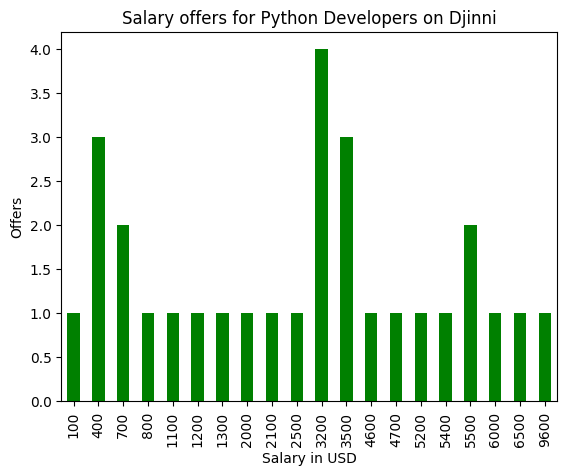

In [134]:
count_of_each_range.plot(kind="bar", color="green")
plt.title("Salary offers for Python Developers on Djinni")
plt.xlabel("Salary in USD")
plt.ylabel("Offers")
plt.show()